In [1]:
#import the packages and 

import os
import CNN 
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [ ]:
#NN parameters
num_files_load = 10
num_epochs = 50 
batch_size = 32
learning_rate = 0.0001
weight_decay = 1e-4

#breakoff parameters
min_validation_loss = float('inf') #initializing validation loss
patience = 3
min_delta = 0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#Initialize the Dataset
root_dir = r'C:\Users\marcd\Desktop\Master\Courses\Machine_Learning\Project\data\CostmiStrings\mock_data'
root_dir = r'/Users/boribbens/Documents/Universiteit_Utrecht/EP_Master/Semester_1/Computational_aspects_of_Machine_Learning/ML_Project/Datafolder/mock_data'
dataset = CNN.signal_dataset(root_dir=root_dir, num_files_load=num_files_load) # shape(10000,2,3,65536)-->(file, signal/label, telescope, time)


In [4]:
#Split into Train/Test

train_size = 0.7
validation_size = 0.2
test_size = 1 - (train_size + validation_size)

train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, validation_size, test_size])


In [5]:
#Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size = batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
# Dummy CNN

# Define the dummy CNN model
dummy_model = CNN.DummyCNN()
# Move the model to the appropriate device
dummy_model = dummy_model.to(device)
# Create a dummy input array (batch_size=1, channels=3, length=65536)
dummy_input = torch.randn(1, 3, 65536).to(device)
# Pass the dummy input through the model
output = dummy_model(dummy_input)

Input shape: torch.Size([1, 3, 65536])
Conv1: torch.Size([1, 16, 65532])
Pool1: torch.Size([1, 16, 32766])
Conv2: torch.Size([1, 32, 16382])
Pool2: torch.Size([1, 32, 8191])
Conv3: torch.Size([1, 64, 4095])
Pool3: torch.Size([1, 64, 2047])
Conv4: torch.Size([1, 128, 1023])
Pool4: torch.Size([1, 128, 511])
Conv5: torch.Size([1, 256, 255])
Pool5: torch.Size([1, 256, 127])
Conv6: torch.Size([1, 256, 64])
Pool6: torch.Size([1, 256, 32])
Flatten: torch.Size([1, 8192])


Epoch [1/50], Train Loss: 0.6964, Val Loss: 0.6926, Val Accuracy: 0.5000
{'min_validation_loss': 0.6925980448722839, 'counter': 0}
Epoch [2/50], Train Loss: 0.6811, Val Loss: 0.6913, Val Accuracy: 0.5000
{'min_validation_loss': 0.6913366317749023, 'counter': 0}
Epoch [3/50], Train Loss: 0.6648, Val Loss: 0.6910, Val Accuracy: 0.5000
{'min_validation_loss': 0.6909829378128052, 'counter': 0}
Epoch [4/50], Train Loss: 0.6507, Val Loss: 0.6923, Val Accuracy: 0.5000
{'min_validation_loss': 0.6909829378128052, 'counter': 1}
Epoch [5/50], Train Loss: 0.6359, Val Loss: 0.6918, Val Accuracy: 0.5000
{'min_validation_loss': 0.6909829378128052, 'counter': 2}
Epoch [6/50], Train Loss: 0.6186, Val Loss: 0.6912, Val Accuracy: 0.5000
{'min_validation_loss': 0.6909829378128052, 'counter': 3}
Early Stop at Epoch: 6

Evaluating on Test Data...
Test Loss: 0.6975, Test Accuracy: 0.5000


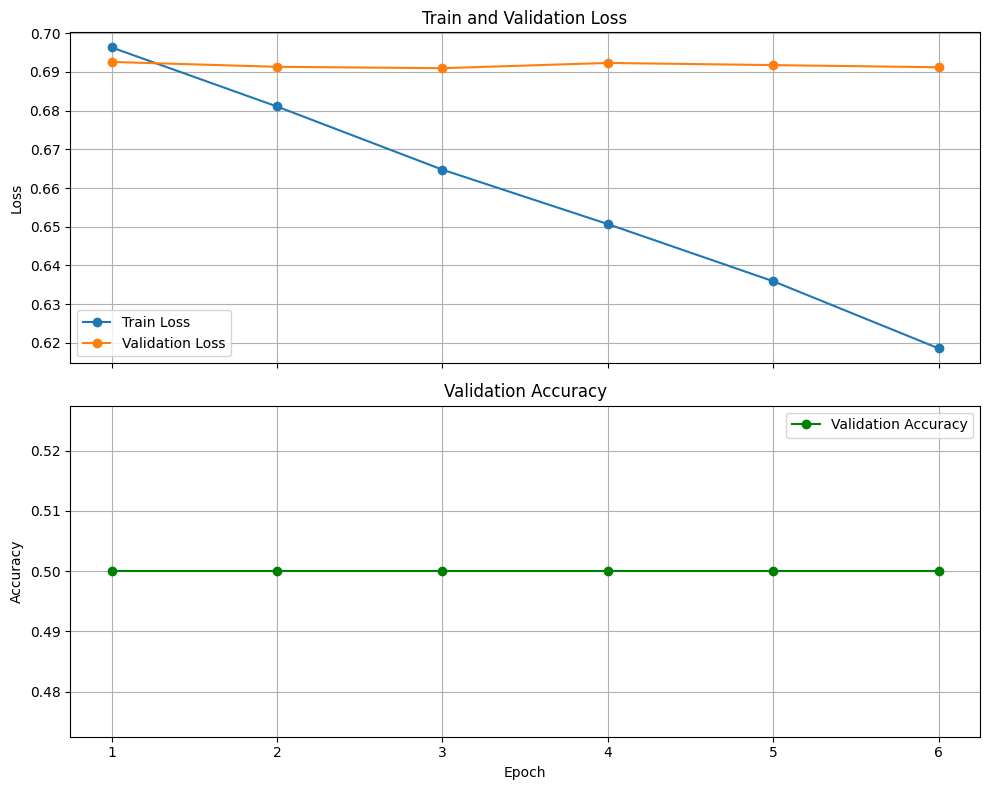

In [7]:
#Run the NN:

CNN.RunNeuralNetwork(train_loader, validation_loader, test_loader, learning_rate, weight_decay, num_epochs, patience, min_delta)